--------------------------------
#### understanding PDF of a t-distribution
-------------------------------

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Generate sample data
np.random.seed(42)

mean_bp    = 121.99
std_dev_bp = 1.99
n_samples  = 50

In [3]:
# Generate 50 random BP readings
samples = np.random.normal(loc  = mean_bp, 
                           scale= std_dev_bp, 
                           size = n_samples)

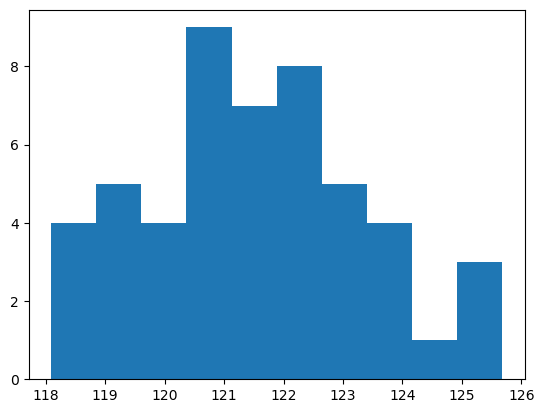

In [5]:
plt.hist(samples);

In [6]:
# Perform a 1-sample t-test
test_value = 120
t_statistic, p_value = stats.ttest_1samp(samples, test_value)

(5.865813063758155, 3.7647883075569573e-07)

In [9]:
# Degrees of freedom
df = n_samples - 1

In [10]:
# Print results
print("Degrees of freedom:", df)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Degrees of freedom: 49
t-statistic: 5.865813063758155
p-value: 3.7647883075569573e-07


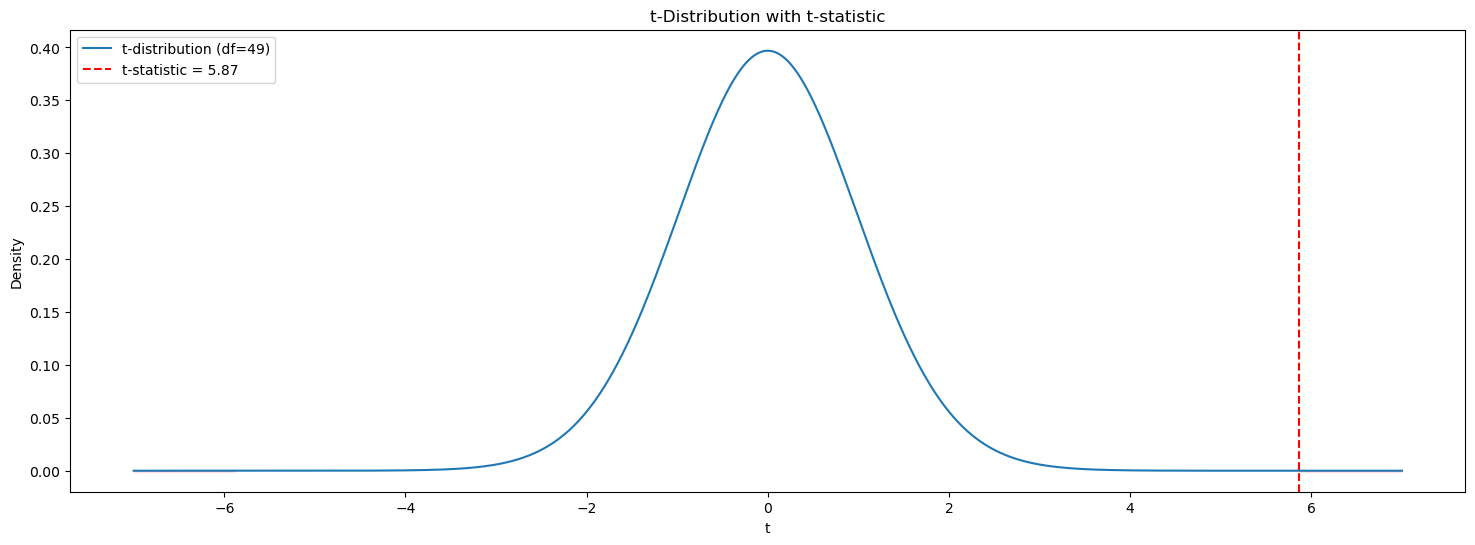

In [18]:
# Plot the t-distribution
x = np.linspace(-7, 7, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(18,6))
plt.plot(x, y, label=f't-distribution (df={df})')
plt.axvline(t_statistic, color='r', linestyle='--', label=f't-statistic = {t_statistic:.2f}')
plt.fill_between(x, 0, y, where=(x > abs(t_statistic)) | (x < -abs(t_statistic)), color='red', alpha=0.3)
plt.legend()
plt.title('t-Distribution with t-statistic')
plt.xlabel('t')
plt.ylabel('Density')
plt.show()

In [14]:
# Illustrate computation of p-value from the t-statistic
p_value_from_cdf = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

print("Computed p-value from t-statistic:", p_value_from_cdf)

Computed p-value from t-statistic: 3.7647883077696065e-07


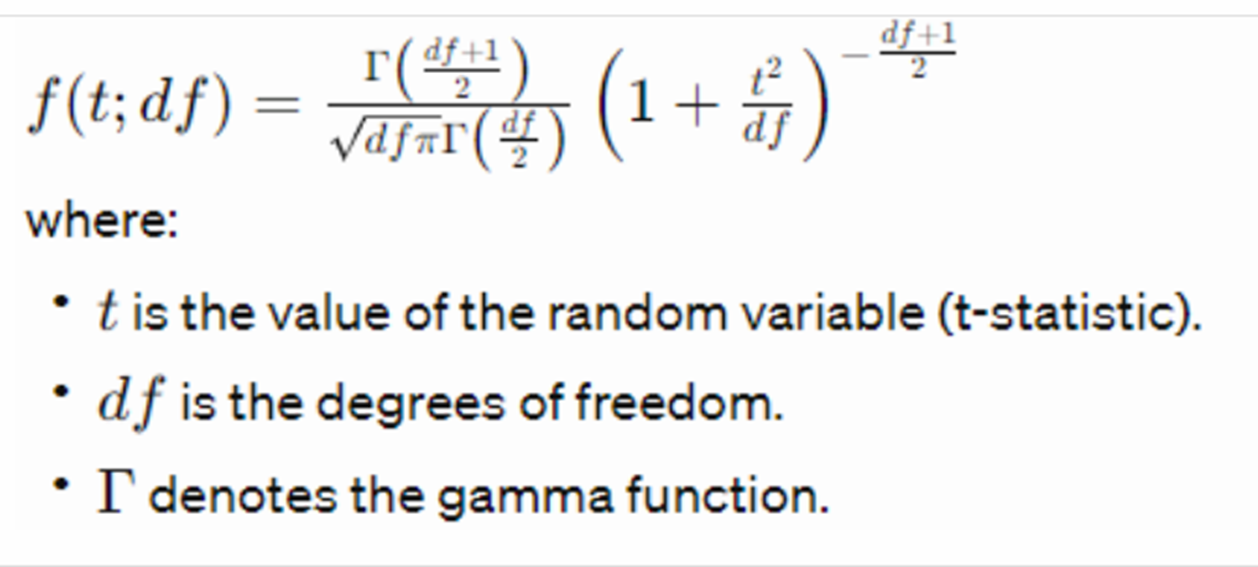

In [29]:
from scipy.special import gamma
from math import pi, sqrt, exp

In [30]:
# Define the explicit PDF of the t-distribution
def t_distribution_pdf(t, df):
    numerator   = gamma((df + 1) / 2)
    denominator = sqrt(df * pi) * gamma(df / 2)
    factor      = (1 + (t**2) / df) ** -((df + 1) / 2)
    
    return numerator / denominator * factor

In [31]:
# Define the PDF of the standard normal distribution
def standard_normal_pdf(x):
    return (1 / sqrt(2 * pi)) * exp(-0.5 * x**2)

In [32]:
# Define the range for t-values
x = np.linspace(-7, 7, 1000)

In [33]:
# Calculate the t-distribution PDF values
y_t_dist = [t_distribution_pdf(t, df) for t in x]

The formula for the probability density function (PDF) of the standard normal distribution is:

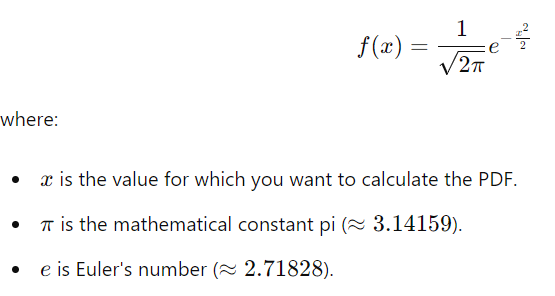

In [34]:
# Calculate the standard normal distribution PDF values for comparison
y_normal = [standard_normal_pdf(t) for t in x]

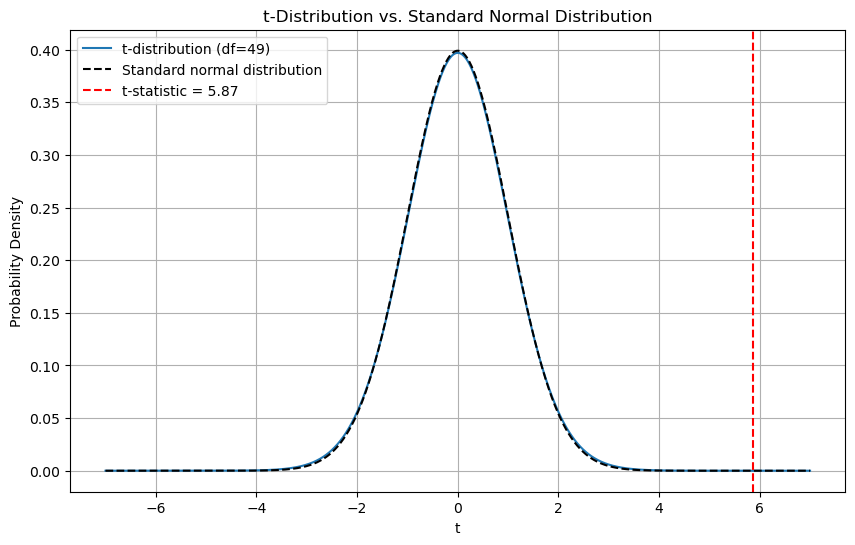

In [40]:
# Plot the t-distribution and the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y_t_dist, label=f't-distribution (df={df})')
plt.plot(x, y_normal, 'k--', label='Standard normal distribution')
plt.axvline(t_statistic, color='red', linestyle='--', label=f't-statistic = {t_statistic:.2f}')

plt.title('t-Distribution vs. Standard Normal Distribution')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

As the degrees of freedom (𝑑𝑓) increase, the t-distribution approaches the standard normal distribution

In [39]:
# Calculate the PDF value at the given t-value
pdf_value = t_distribution_pdf(t_statistic, df)

print(f"PDF value at t = {t_statistic} with df = {df} is {pdf_value}")

PDF value at t = 5.865813063758155 with df = 49 is 6.659392404145992e-07


In [44]:
from scipy.integrate import quad

In [59]:
# Define the CDF of the t-distribution using numerical integration
def t_distribution_cdf(t, df):
    result, _ = quad(t_distribution_pdf, -np.inf, t, args=(df,))
    return result

In [60]:
# Calculate the CDF value at the given t-statistic value
cdf_value = t_distribution_cdf(t_statistic, df)
print(f"CDF value at t = {t_statistic} with df = {df} is {cdf_value}")

CDF value at t = 5.865813063758155 with df = 49 is 0.9999998117605837


In [63]:
from scipy.stats import t

In [64]:
# Calculate the t-value corresponding to the 95th percentile (two-tailed test)
t_95 = t.ppf(0.975, df)  # 97.5th percentile for two-tailed test
print(f"95% critical t-value with df = {df} is {t_95}")

95% critical t-value with df = 49 is 2.009575234489209


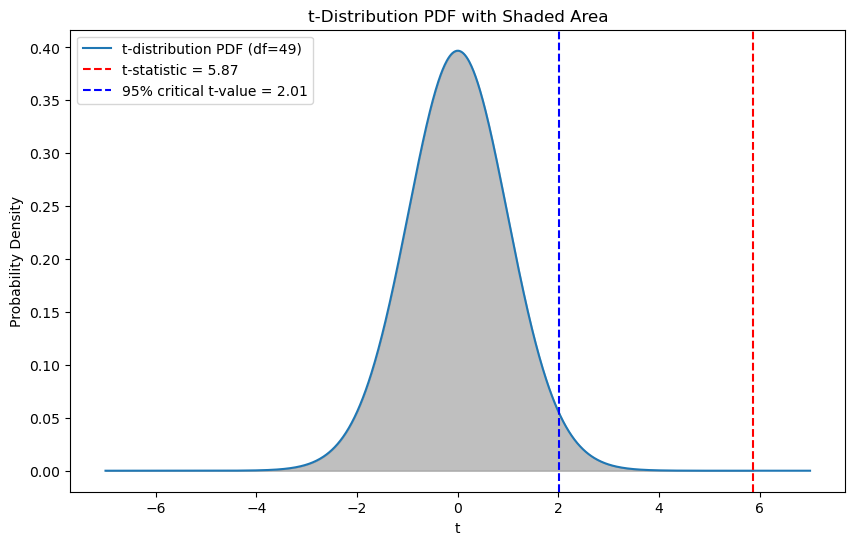

In [65]:
# Plot the t-distribution PDF and shade the area under the curve up to the t-statistic
plt.figure(figsize=(10, 6))
plt.plot(x, y_t_dist, label=f't-distribution PDF (df={df})')
plt.axvline(t_statistic, color='red', linestyle='--', label=f't-statistic = {t_statistic:.2f}')
plt.axvline(t_95, color='blue', linestyle='--', label=f'95% critical t-value = {t_95:.2f}')
plt.fill_between(x, y_t_dist, where=(x <= t_statistic), color='gray', alpha=0.5)

plt.title('t-Distribution PDF with Shaded Area')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

- The CDF value at 𝑡=5.865813063758155 with 𝑑𝑓=49 is approximately 0.9999998117605837.
- This value exceeds 95%, indicating that the test statistic falls in the tail of the distribution, beyond the critical region.
- Therefore, we have strong evidence to reject the null hypothesis.

In [66]:
# Illustrate computation of p-value from the t-statistic
p_value_from_cdf = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

print("Computed p-value from t-statistic:", p_value_from_cdf)

Computed p-value from t-statistic: 3.7647883077696065e-07


p-value computation

In [69]:
1 - 0.9999998117605837

1.8823941627665874e-07

In [70]:
1.8823941627665874e-07 * 2

3.764788325533175e-07